# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
#wasn't included but just in case
import json
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
#create variables to hold the weather info
clouds = []
foundcity = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []

print("Looking up cities....")
# Build query URL
for city in cities:
    try:        
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        print(f'I am getting the info for {city}')
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
# Get the info from the response and build arrays we can dataframe later.
        clouds.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        lat.append(weather_json["coord"]["lat"])
        long.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        foundcity.append(weather_json["name"])
    except:
        print(f"Could not find info for {city} ")
    continue



Looking up cities....
I am getting the info for avarua
I am getting the info for deputatskiy
I am getting the info for mahebourg
I am getting the info for palabuhanratu
Could not find info for palabuhanratu 
I am getting the info for saint-philippe
I am getting the info for ambilobe
I am getting the info for chor
I am getting the info for acari
I am getting the info for longlac
Could not find info for longlac 
I am getting the info for ambon
I am getting the info for bektemir
I am getting the info for rikitea
I am getting the info for jiddah
Could not find info for jiddah 
I am getting the info for ahipara
I am getting the info for punta arenas
I am getting the info for kyaikkami
I am getting the info for port macquarie
I am getting the info for busselton
I am getting the info for kavaratti
I am getting the info for changping
I am getting the info for nizhneyansk
Could not find info for nizhneyansk 
I am getting the info for elko
I am getting the info for roald
I am getting the info fo

I am getting the info for kearney
I am getting the info for santa maria
I am getting the info for yulara
I am getting the info for prudy
I am getting the info for cravo norte
I am getting the info for ancud
I am getting the info for boa vista
I am getting the info for mana
I am getting the info for sumenep
I am getting the info for vao
I am getting the info for te anau
I am getting the info for conde
I am getting the info for svetlyy
I am getting the info for poronaysk
I am getting the info for bambous virieux
I am getting the info for aleksandrovskoye
I am getting the info for klamath falls
I am getting the info for shimoda
I am getting the info for marcona
Could not find info for marcona 
I am getting the info for naron
I am getting the info for luanda
I am getting the info for wanaka
I am getting the info for ojinaga
I am getting the info for burnie
I am getting the info for mount pleasant
I am getting the info for kautokeino
I am getting the info for voh
I am getting the info for s

I am getting the info for lata
I am getting the info for tarakan
I am getting the info for road town
I am getting the info for kirakira
I am getting the info for mitu
I am getting the info for puerto del rosario
I am getting the info for tiarei
I am getting the info for pundaguitan
I am getting the info for valley city
I am getting the info for wolow
I am getting the info for belyy yar
I am getting the info for kushima
I am getting the info for aripuana
I am getting the info for pitimbu
I am getting the info for vila franca do campo
I am getting the info for yar-sale
I am getting the info for iranshahr
I am getting the info for san cristobal
I am getting the info for punta cardon
I am getting the info for den chai
I am getting the info for cascais
I am getting the info for sorland
I am getting the info for moose factory
I am getting the info for coari
I am getting the info for wundanyi
I am getting the info for lithgow
I am getting the info for tralee
I am getting the info for nosy var

In [5]:
# Create a dictonary that we can turn into a DF
weatherpy_dict = {
    "City": foundcity,
    "Clouds":clouds, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":long, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}
# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()        

City          559
Clouds        559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Save data frame to CSV
weather_data.to_csv('../output_data/weather_data.csv')

# Display data frame head 
weather_data.head()



,City,Clouds,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Avarua,100,CK,1591809884,73,-21.21,-159.78,77.00,11.41
1,Deputatsky,91,RU,1591809884,82,69.30,139.90,36.43,6.64
2,Mahébourg,75,MU,1591809884,78,-20.41,57.70,71.60,18.34
3,Saint-Philippe,20,RE,1591809884,73,-21.36,55.77,71.60,19.46
4,Ambilobe,0,MG,1591809884,74,-13.20,49.05,70.48,3.80


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Get names of indexes for which column humidity has value over 99
#  Get the indices of cities that have humidity over 100%.
indexNames = weather_data[ weather_data['Humidity'] > 100 ].index
print(indexNames)
# Delete these row indexes from dataFrame
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
lowhumid_df = weather_data.drop(indexNames , inplace=False)
lowhumid_df.sort_values("Humidity", axis = 0, ascending = False, inplace = True)
lowhumid_df.head()



Int64Index([], dtype='int64')


,City,Clouds,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
192,Ancud,90,CL,1591809893,100,-41.87,-73.82,54.00,8.05
378,Gejiu,99,CN,1591809903,100,23.31,103.16,59.86,2.35
61,Cerro Largo,40,BR,1591809887,100,-28.15,-54.74,72.00,5.82
132,Galesong,20,ID,1591809890,100,-5.32,119.37,75.20,2.24
548,Hay River,90,CA,1591809912,100,60.82,-115.80,39.20,6.93


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature (Farenheit)')

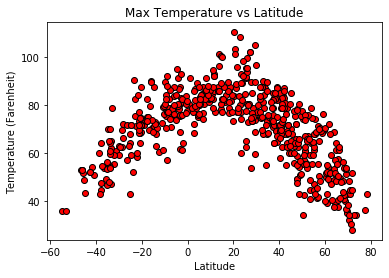

In [8]:
plt.scatter(lowhumid_df["Lat"], lowhumid_df["Max Temp"], marker="o", facecolors="red", edgecolors="black")
plt.title("Max Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Farenheit)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

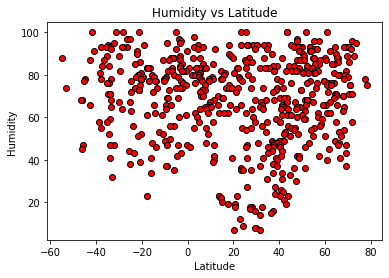

In [9]:
plt.scatter(lowhumid_df["Lat"], lowhumid_df["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

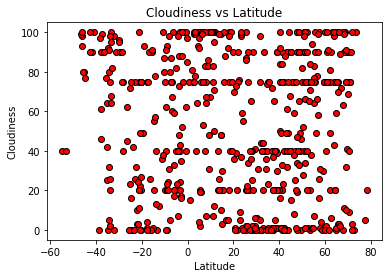

In [10]:
plt.scatter(lowhumid_df["Lat"], lowhumid_df["Clouds"], marker="o", facecolors="red", edgecolors="black")
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

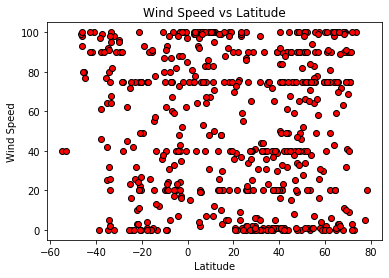

In [11]:
plt.scatter(lowhumid_df["Lat"], lowhumid_df["Clouds"], marker="o", facecolors="red", edgecolors="black")
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

## Linear Regression

In [12]:

# OPTIONAL: Create a function to create Linear Regression plots


In [13]:
# Create Northern and Southern Hemisphere DataFrames
# Get names of indexes for which column latitude is greater than 0 for northern and less than for southern.

northern_hem_index = weather_data[ weather_data['Lat'] > 0 ].index

southern_hem_index = weather_data[ weather_data['Lat'] < 0 ].index
# Delete these row indexes from dataFrame to create a df w/ just southern hemisphere.


# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "southern hemisphere".
southern_hem_df = weather_data.drop(northern_hem_index , inplace=False)
northern_hem_df = weather_data.drop(southern_hem_index , inplace=False)

southern_hem_df.sort_values("Lat", axis = 0, ascending = False, inplace = True)
northern_hem_df.sort_values("Lat", axis = 0, ascending = False, inplace = True)

southern_hem_df.head()


,City,Clouds,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
334,Tucumã,97,BR,1591809900,91,-0.18,-50.05,77.72,5.84
156,Garissa,85,KE,1591809891,47,-0.45,39.64,81.97,15.90
82,Hithadhoo,100,MV,1591809888,75,-0.60,73.08,84.06,13.71
36,Puerto Ayora,40,EC,1591809886,61,-0.74,-90.35,80.60,14.99
432,Palu,62,ID,1591809906,82,-0.89,119.87,76.62,2.35


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

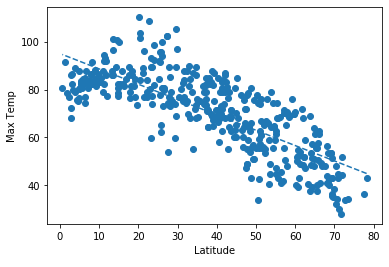

In [14]:
# Generate a scatter plot of lat versus max temp
northern_lat = northern_hem_df.iloc[:,5]
northern_max_temp = northern_hem_df.iloc[:,7]

# Perform a linear regression on latitude vs Max temp for the Northern Hemisphere
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(northern_lat, northern_max_temp)

# Create equation of line to calculate predicted max temp
vc_fit = vc_slope * northern_lat + vc_int
#create the line equation
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2)) 
# Plot the linear model on top of scatter plot 
plt.scatter(northern_lat,northern_max_temp)
plt.plot(northern_lat,vc_fit,"--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

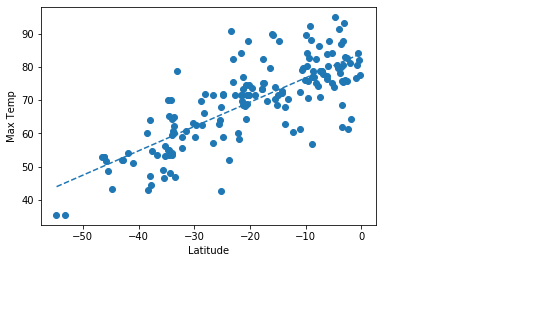

In [15]:
# Generate a scatter plot of lat versus max temp
southern_lat = southern_hem_df.iloc[:,5]
southern_max_temp = southern_hem_df.iloc[:,7]

# Perform a linear regression on latitude vs Max temp for the Northern Hemisphere
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(southern_lat, southern_max_temp)

# Create equation of line to calculate predicted max temp
vc_fit = vc_slope * southern_lat + vc_int
#create the line equation
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2)) 
# Plot the linear model on top of scatter plot 
plt.scatter(southern_lat,southern_max_temp)
plt.plot(southern_lat,vc_fit,"--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

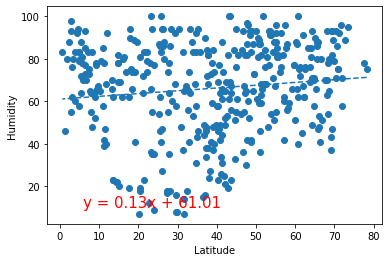

In [16]:
# Generate a scatter plot of lat versus max temp
northern_lat = northern_hem_df.iloc[:,5]
northern_humid = northern_hem_df.iloc[:,4]

# Perform a linear regression on latitude vs Max temp for the Northern Hemisphere
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(northern_lat, northern_humid)

# Create equation of line to calculate predicted max temp
vc_fit = vc_slope * northern_lat + vc_int
#create the line equation
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2)) 
# Plot the linear model on top of scatter plot 
plt.scatter(northern_lat,northern_humid)
plt.plot(northern_lat,vc_fit,"--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

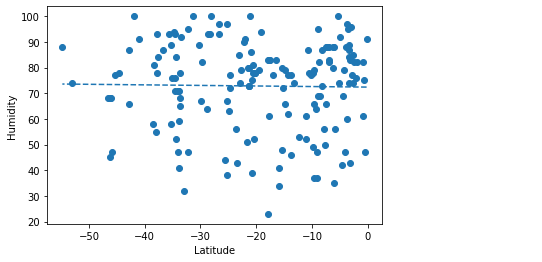

In [17]:
# Generate a scatter plot of lat versus max temp
southern_lat = southern_hem_df.iloc[:,5]
southern_humid = southern_hem_df.iloc[:,4]

# Perform a linear regression on latitude vs Max temp for the Northern Hemisphere
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(southern_lat, southern_humid)

# Create equation of line to calculate predicted max temp
vc_fit = vc_slope * southern_lat + vc_int
#create the line equation
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2)) 
# Plot the linear model on top of scatter plot 
plt.scatter(southern_lat,southern_humid)
plt.plot(southern_lat,vc_fit,"--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

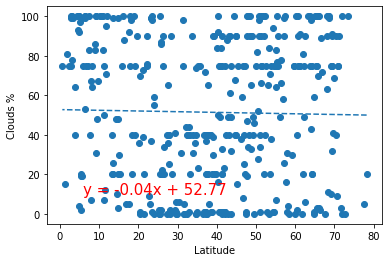

In [18]:
# Generate a scatter plot of lat versus max temp
northern_lat = northern_hem_df.iloc[:,5]
northern_cloud = northern_hem_df.iloc[:,1]

# Perform a linear regression on latitude vs Max temp for the Northern Hemisphere
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(northern_lat, northern_cloud)

# Create equation of line to calculate predicted max temp
vc_fit = vc_slope * northern_lat + vc_int
#create the line equation
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2)) 
# Plot the linear model on top of scatter plot 
plt.scatter(northern_lat,northern_cloud)
plt.plot(northern_lat,vc_fit,"--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Clouds %')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

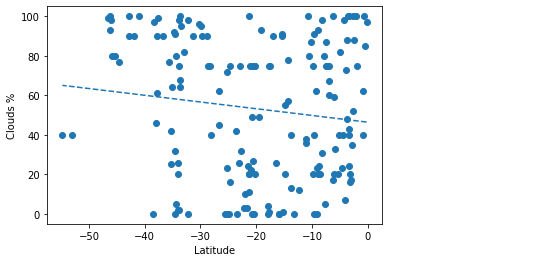

In [19]:
# Generate a scatter plot of lat versus max temp
southern_lat = southern_hem_df.iloc[:,5]
southern_cloud = southern_hem_df.iloc[:,1]

# Perform a linear regression on latitude vs Max temp for the Northern Hemisphere
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(southern_lat, southern_cloud)

# Create equation of line to calculate predicted max temp
vc_fit = vc_slope * southern_lat + vc_int
#create the line equation
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2)) 
# Plot the linear model on top of scatter plot 
plt.scatter(southern_lat,southern_cloud)
plt.plot(southern_lat,vc_fit,"--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Clouds %')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

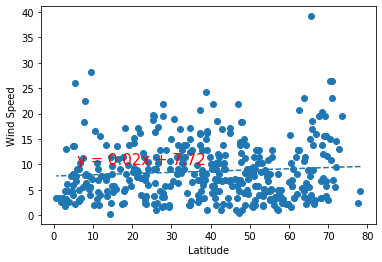

In [20]:
# Generate a scatter plot of lat versus max temp
northern_lat = northern_hem_df.iloc[:,5]
northern_wind = northern_hem_df.iloc[:,8]

# Perform a linear regression on latitude vs Max temp for the Northern Hemisphere
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(northern_lat, northern_wind)

# Create equation of line to calculate predicted max temp
vc_fit = vc_slope * northern_lat + vc_int
#create the line equation
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2)) 
# Plot the linear model on top of scatter plot 
plt.scatter(northern_lat,northern_wind)
plt.plot(northern_lat,vc_fit,"--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

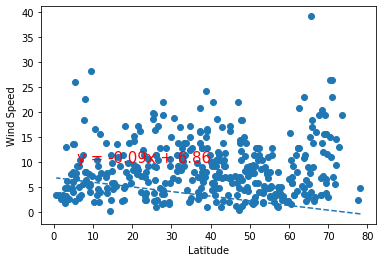

In [21]:
# Generate a scatter plot of lat versus max temp
southern_lat = southern_hem_df.iloc[:,5]
southern_wind = southern_hem_df.iloc[:,8]

# Perform a linear regression on latitude vs Max temp for the Northern Hemisphere
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(southern_lat, southern_wind)

# Create equation of line to calculate predicted max temp
vc_fit = vc_slope * northern_lat + vc_int
#create the line equation
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2)) 
# Plot the linear model on top of scatter plot 
plt.scatter(northern_lat,northern_wind)
plt.plot(northern_lat,vc_fit,"--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()